In [7]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv
from sklearn.preprocessing import LabelEncoder

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])

#rename columns
df.rename(columns={'Working Professional or Student': 'Working Student', 'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts', 'Family History of Mental Illness':'Family Mental Illness' }, inplace=True)

# Convert all column names to snake_case
df.columns = (
    df.columns
    .str.strip()                              # remove leading/trailing spaces
    .str.replace(' ', '_')                    # replace spaces with underscores
    .str.replace('[^A-Za-z0-9_]+', '', regex=True)  # remove special characters
    .str.lower()            
                      # convert to lowercase (optional)
)

# View result
df.head()

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [8]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                            0
name                          0
gender                        0
age                           0
city                          0
working_student               0
profession                36630
academic_pressure        112803
work_pressure             27918
cgpa                     112802
study_satisfaction       112803
job_satisfaction          27910
sleep_duration                0
dietary_habits                4
degree                        2
suicidal_thoughts             0
workstudy_hours               0
financial_stress              4
family_mental_illness         0
depression                    0
dtype: int64

In [9]:
# Preprocessing
# Convert Yes/No columns to binary (1/0)
df = df.map(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
# Make working_student binary: 1 if working, 0 if student
df['working_student'] = df['working_student'].map({'Working Professional': 1, 'Student': 0})
# Convert gender to binary: Male = 1, Female = 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
# remove sleep_duration occurences that have less than 10 appearences
df = df[df['sleep_duration'].isin(df['sleep_duration'].value_counts()[df['sleep_duration'].value_counts() >= 10].index)]
# remove dietary_habits occurences that have less than 10 appearences
df = df[df['dietary_habits'].isin(df['dietary_habits'].value_counts()[df['dietary_habits'].value_counts() >= 10].index)]
# Set dietary_habits Unhealthy(0) Moderate(1) Healthy (2)
df["dietary_habits"] = df["dietary_habits"].map({
    "Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2
})
#if profession is student then make profession "Student"
df.loc[df["working_student"] == 0, "profession"] = "Student"
#If profession is still NaN, set to "Unemployed"
df.loc[df["profession"].isna(), "profession"] = "Unemployed"
#Map sleeping hours to numbers
df['sleep_duration'] = LabelEncoder().fit_transform(df['sleep_duration'])
df['degree'] = LabelEncoder().fit_transform(df['degree'])

#print 
display(df.isna().sum())
display(df.sample(5))

id                            0
name                          0
gender                        0
age                           0
city                          0
working_student               0
profession                    0
academic_pressure        112737
work_pressure             27890
cgpa                     112736
study_satisfaction       112737
job_satisfaction          27882
sleep_duration                0
dietary_habits                0
degree                        0
suicidal_thoughts             0
workstudy_hours               0
financial_stress              4
family_mental_illness         0
depression                    0
dtype: int64

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
53636,53636,Rupak,1,55.0,Pune,1,Chef,NaN,3.0,NaN,NaN,3.0,0.0,1,MHM,0,7.0,5.0,0,0
23564,23564,Virat,1,36.0,Vasai-Virar,1,Teacher,NaN,3.0,NaN,NaN,4.0,0.0,2,MA,0,4.0,5.0,0,0
21692,21692,Rupak,1,28.0,Hyderabad,1,Teacher,NaN,4.0,NaN,NaN,2.0,3.0,0,MD,0,10.0,4.0,0,0
99482,99482,Rudra,1,33.0,Ahmedabad,1,Consultant,NaN,2.0,NaN,NaN,4.0,0.0,0,BBA,1,10.0,4.0,1,0
91073,91073,Advait,1,39.0,Chennai,1,Doctor,NaN,1.0,NaN,NaN,1.0,1.0,1,B.Pharm,0,9.0,1.0,1,0
31885,31885,Vihaan,1,54.0,Nashik,1,Chef,NaN,3.0,NaN,NaN,1.0,0.0,0,MHM,0,8.0,2.0,0,0
58013,58013,Lavanya,0,60.0,Vasai-Virar,1,Travel Consultant,NaN,2.0,NaN,NaN,1.0,1.0,0,MHM,1,2.0,2.0,0,0
124211,124211,Jhanvi,0,35.0,Pune,1,Teacher,NaN,1.0,NaN,NaN,1.0,3.0,1,M.Tech,1,12.0,2.0,0,0
12982,12982,Ishaani,0,29.0,Surat,0,Student,1.0,NaN,8.91,3.0,NaN,0.0,2,ME,0,8.0,2.0,0,0
103463,103463,Anika,0,24.0,Kanpur,1,Mechanical Engineer,NaN,5.0,NaN,NaN,5.0,0.0,2,BCA,0,10.0,5.0,0,0


In [10]:
#Now we want to split it into 2 datasets, students and workers
students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

display(students_df)

,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
2,2,Yuvraj,1,33.0,Visakhapatnam,Student,5.0,8.97,2.0,1,2,21,1,3.0,1.0,0,1
8,8,Aishwarya,0,24.0,Bangalore,Student,2.0,5.90,5.0,1,1,36,0,3.0,2.0,1,0
26,26,Aditya,1,31.0,Srinagar,Student,3.0,7.03,5.0,3,2,25,0,9.0,1.0,1,0
30,30,Prisha,0,28.0,Varanasi,Student,3.0,5.59,2.0,2,1,29,1,4.0,5.0,1,1
32,32,Chhavi,0,25.0,Jaipur,Student,4.0,8.13,3.0,1,1,78,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,0,27.0,Surat,Student,5.0,5.75,5.0,1,0,45,1,7.0,1.0,1,0
140686,140686,Rohan,1,27.0,Ludhiana,Student,2.0,9.40,3.0,3,2,89,0,0.0,3.0,1,0
140689,140689,Ayaan,1,31.0,Faridabad,Student,3.0,6.61,4.0,1,0,83,0,12.0,2.0,0,0
140690,140690,Rashi,0,18.0,Ludhiana,Student,5.0,6.88,2.0,3,2,45,1,10.0,5.0,0,1


In [11]:
#scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

student_numeric_cols = students_df.select_dtypes(include=["number"]).columns.drop({'id', 'gender', 'suicidal_thoughts', 'family_mental_illness', 'depression'})
students_df[student_numeric_cols] = scaler.fit_transform(students_df[student_numeric_cols])

working_numeric_cols = working_df.select_dtypes(include=["number"]).columns.drop({'id', 'gender', 'suicidal_thoughts', 'family_mental_illness', 'depression'})
working_df[working_numeric_cols] = scaler.fit_transform(working_df[working_numeric_cols])

display(students_df)
display(working_df)

,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
2,2,Yuvraj,1,1.463387,Visakhapatnam,Student,1.345625,0.895455,-0.694404,-1.421856,1.374590,-1.088531,1,-1.121781,-1.48901,0,1
8,8,Aishwarya,0,-0.371209,Bangalore,Student,-0.827297,-1.200940,1.511271,-1.421856,0.119835,-0.492558,0,-1.121781,-0.79326,1,0
26,26,Aditya,1,1.055699,Srinagar,Student,-0.102990,-0.429303,1.511271,0.461765,1.374590,-0.929605,0,0.496712,-1.48901,1,0
30,30,Prisha,0,0.444167,Varanasi,Student,-0.102990,-1.412628,-0.694404,-0.480045,0.119835,-0.770679,1,-0.852032,1.29399,1,1
32,32,Chhavi,0,-0.167365,Jaipur,Student,0.621317,0.321848,0.040821,-1.421856,0.119835,1.176166,1,-1.661279,-1.48901,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,0,0.240323,Surat,Student,1.345625,-1.303370,1.511271,-1.421856,-1.134920,-0.134974,1,-0.042785,-1.48901,1,0
140686,140686,Rohan,1,0.240323,Ludhiana,Student,-0.827297,1.189086,0.040821,0.461765,1.374590,1.613213,0,-1.931028,-0.09751,1,0
140689,140689,Ayaan,1,1.055699,Faridabad,Student,-0.102990,-0.716106,0.776046,-1.421856,-1.134920,1.374823,0,1.305959,-0.79326,0,0
140690,140690,Rashi,0,-1.594274,Ludhiana,Student,1.345625,-0.531733,-0.694404,0.461765,1.374590,-0.134974,1,0.766461,1.29399,0,1


,id,name,gender,age,city,profession,work_pressure,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,0,0.457458,Ludhiana,Chef,1.423374,-0.688174,1.366330,1.229964,-0.626486,0,-1.303934,-0.677175,0,0
1,1,Vivan,1,-1.643013,Varanasi,Teacher,0.712037,0.017967,0.447387,-1.256096,0.465831,1,0.251907,0.034454,0,1
3,3,Yuvraj,1,-2.008313,Mumbai,Teacher,1.423374,-1.394315,0.447387,-0.013066,-0.808538,1,1.029828,-1.388803,1,1
4,4,Rhea,0,-1.277714,Kanpur,Business Analyst,-1.421973,-1.394315,-1.390499,-1.256096,-0.808538,1,0.770521,0.746083,1,0
5,5,Vani,0,1.370706,Ahmedabad,Finanancial Analyst,-0.710636,1.430250,-1.390499,1.229964,1.157631,0,0.251907,1.457711,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,Ishaani,0,0.092158,Ahmedabad,Teacher,-0.710636,1.430250,0.447387,-0.013066,-1.099823,1,-1.303934,1.457711,0,0
140695,140695,Vidya,0,-2.373612,Ahmedabad,Unemployed,1.423374,0.724108,-1.390499,-1.256096,-0.189559,0,-1.044627,0.746083,1,1
140696,140696,Lata,0,-0.273141,Hyderabad,Content Writer,1.423374,0.724108,-0.471556,-0.013066,-0.954181,1,-0.007400,1.457711,1,0
140697,140697,Aanchal,0,-1.825663,Kolkata,Marketing Manager,0.000701,-1.394315,1.366330,-0.013066,-1.136233,0,-0.526013,0.746083,0,0


In [12]:
# from OurModels import LinearRegressionModel
# model = LinearRegressionModel()
# modelResults = model.train(students_df)
# model.output(*modelResults)  # unpack y_pred, y_test
# model.charts(*modelResults)

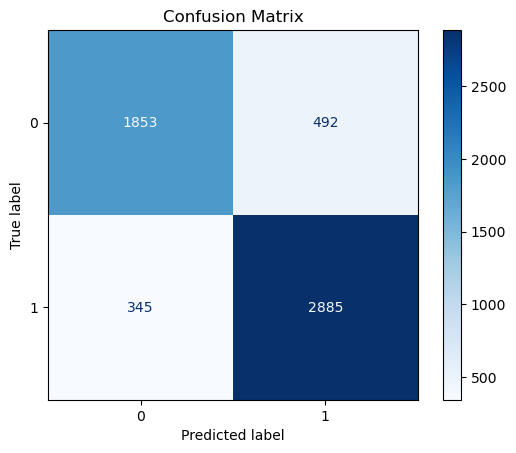


📊 SVC Model Performance
----------------------------------------
Accuracy : 0.8499
Precision: 0.8496
Recall   : 0.8499
F1 Score : 0.8491
ROC AUC  : N/A (probabilities not available)
----------------------------------------


In [13]:
from OurModels import RandomForestRegressorModel
model = RandomForestRegressorModel()
studentModelResults = model.train(students_df)
model.charts(*studentModelResults)
model.output(*studentModelResults)